### DIGIT RECOGNITION USING MNIST DATA

In [4]:
import numpy as np

In [6]:
pip install mnist

In [17]:
import mnist as mn

In [8]:
import matplotlib.pyplot as plt

In [9]:
from keras.models import Sequential

Using TensorFlow backend.
C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\rituv\.conda\envs\tensorflow\lib

In [11]:
from keras.layers import Dense

In [13]:
from keras.utils import to_categorical

In [18]:
train_i = mn.train_images()
train_l = mn.train_labels()
test_i = mn.test_images()
test_l = mn.test_labels()

Normalizing the image pixel from [0,255] to [-0.5,0.5] to make it easier to train

In [19]:
train_i = (train_i/255) - 0.5

In [20]:
test_i = (test_i/255) - 0.5

Flatten each 28x28 image into a 784 dimensional vector to pass into ANN

In [21]:
train_i = train_i.reshape((-1, 784))

In [22]:
test_i = test_i.reshape((-1, 784))

In [23]:
train_i.shape

(60000, 784)

In [24]:
test_i.shape

(10000, 784)

In [25]:
seq = Sequential()

In [26]:
seq.add(Dense(64, activation='relu', input_dim = 784))
seq.add(Dense(64, activation='relu'))
seq.add(Dense(10, activation='softmax'))

Loss fun (how well model did on training and how to improve it with optimizer )

In [27]:
seq.compile(
            optimizer = 'adam',
            loss = 'categorical_crossentropy',
            metrics = ['accuracy']
            
)

In [28]:
seq.fit(
        train_i,
        to_categorical(train_l),
        epochs = 5, 
        batch_size = 32
)


Epoch 1/5
60000/60000 [==============================] - 29s 478us/step - loss: 0.3538 - accuracy: 0.8940s - loss: 0.3 - ETA: 0s
Epoch 2/5
60000/60000 [==============================] - 26s 427us/step - loss: 0.1827 - accuracy: 0.9452
Epoch 3/5
60000/60000 [==============================] - 24s 395us/step - loss: 0.1403 - accuracy: 0.9563
Epoch 4/5
60000/60000 [==============================] - 22s 362us/step - loss: 0.1209 - accuracy: 0.9625
Epoch 5/5
60000/60000 [==============================] - 26s 433us/step - loss: 0.1052 - accuracy: 0.9668


In [31]:
seq.evaluate(
        test_i,
        to_categorical(test_l)
)

10000/10000 [==============================] - 2s 189us/step


[0.10173796941386536, 0.9661999940872192]

In [33]:
predictions = seq.predict(test_i[:5])

In [34]:
predictions

array([[2.56001999e-06, 4.97757355e-06, 4.40528325e-04, 7.48227059e-04,
        1.35363516e-08, 4.14428087e-06, 2.01543339e-12, 9.98784244e-01,
        4.40838903e-06, 1.09779585e-05],
       [2.52492100e-05, 1.38425454e-03, 9.82021809e-01, 1.51305329e-02,
        1.19844435e-06, 4.18473937e-05, 1.55839240e-04, 3.94925230e-08,
        1.23935414e-03, 2.69340781e-08],
       [3.67652575e-08, 9.98601854e-01, 2.80452601e-04, 7.07963409e-05,
        6.24587527e-04, 2.83942563e-06, 2.25765889e-05, 1.72962682e-04,
        1.81265248e-04, 4.24831305e-05],
       [9.99496341e-01, 1.81626501e-08, 3.38740865e-05, 6.37693738e-05,
        3.21660032e-08, 2.31085040e-04, 2.28317458e-06, 2.30798923e-06,
        1.61345124e-05, 1.54409398e-04],
       [4.05340330e-07, 5.05960296e-09, 4.35397055e-07, 8.91718088e-10,
        9.99310255e-01, 1.00869056e-06, 1.36553160e-06, 8.63508030e-05,
        7.07581023e-07, 5.99579769e-04]], dtype=float32)

In [36]:
np.argmax(predictions, axis=1)

array([7, 2, 1, 0, 4], dtype=int64)

In [37]:
test_l [:5]

array([7, 2, 1, 0, 4], dtype=uint8)

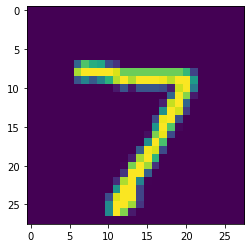

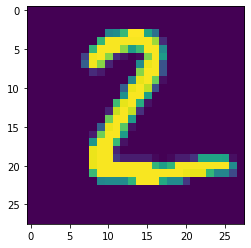

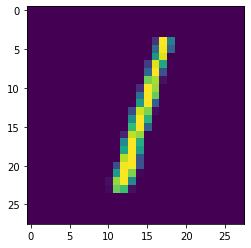

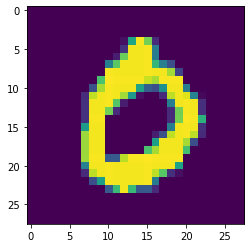

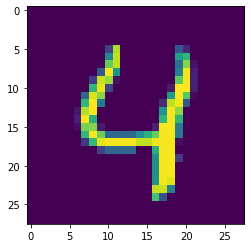

In [42]:
for i in range(0,5):
    first = test_i[i]
    first = np.array(first, dtype = 'float')
    pixels = first.reshape((28,28))
    plt.imshow(pixels)
    plt.show()